In [3]:
import sys
sys.path.append("../")
from preprocessing.create_train_test_dicts import build_splits
import numpy as np
import matplotlib.pyplot as plt
ds = build_splits()
train_split = ds['train_numeric']
val_split = ds['val_numeric']
test_split = ds['test_numeric']
train_split['happy'][0].shape

KeyboardInterrupt: 

In [ ]:
from preprocessing.knn_preprocess_new import fit_knn_from_dict,dict_to_features_with_fitted, KNNParamSearch
from sklearn.metrics import accuracy_score, f1_score

metrics = {
    "accuracy": accuracy_score,
    "f1_weighted": lambda y_true, y_pred: f1_score(
        y_true, y_pred, average="weighted"
    ),
}

search = KNNParamSearch(
    train_dict=train_split,
    val_dict=val_split,
    pca_dims=[10, 20, 30, 40, 50, 60, 70, 90, 110, 130, 150, 200],
    k_values=[3,5,8,11,13,15,18,21],
    metrics=metrics,
)

results = search.run()


Evaluating: PCA=10, k=3
Evaluating: PCA=10, k=5
Evaluating: PCA=10, k=8
Evaluating: PCA=10, k=11
Evaluating: PCA=10, k=13
Evaluating: PCA=10, k=15
Evaluating: PCA=10, k=18
Evaluating: PCA=10, k=21
Evaluating: PCA=20, k=3
Evaluating: PCA=20, k=5
Evaluating: PCA=20, k=8
Evaluating: PCA=20, k=11
Evaluating: PCA=20, k=13
Evaluating: PCA=20, k=15
Evaluating: PCA=20, k=18
Evaluating: PCA=20, k=21
Evaluating: PCA=30, k=3
Evaluating: PCA=30, k=5
Evaluating: PCA=30, k=8
Evaluating: PCA=30, k=11
Evaluating: PCA=30, k=13
Evaluating: PCA=30, k=15
Evaluating: PCA=30, k=18
Evaluating: PCA=30, k=21
Evaluating: PCA=40, k=3
Evaluating: PCA=40, k=5
Evaluating: PCA=40, k=8
Evaluating: PCA=40, k=11
Evaluating: PCA=40, k=13
Evaluating: PCA=40, k=15
Evaluating: PCA=40, k=18
Evaluating: PCA=40, k=21
Evaluating: PCA=50, k=3
Evaluating: PCA=50, k=5
Evaluating: PCA=50, k=8
Evaluating: PCA=50, k=11
Evaluating: PCA=50, k=13
Evaluating: PCA=50, k=15
Evaluating: PCA=50, k=18
Evaluating: PCA=50, k=21
Evaluating: PCA

In [ ]:
import pandas as pd

df = pd.DataFrame(results)
df



,pca_dim,k,accuracy,f1_weighted
0,10,3,0.342479,0.340396
1,10,5,0.345404,0.342535
2,10,8,0.349582,0.346152
3,10,11,0.350000,0.344953
4,10,13,0.347075,0.341594
...,...,...,...,...
91,200,11,0.280641,0.271099
92,200,13,0.275209,0.265662
93,200,15,0.274652,0.263173
94,200,18,0.271170,0.254507


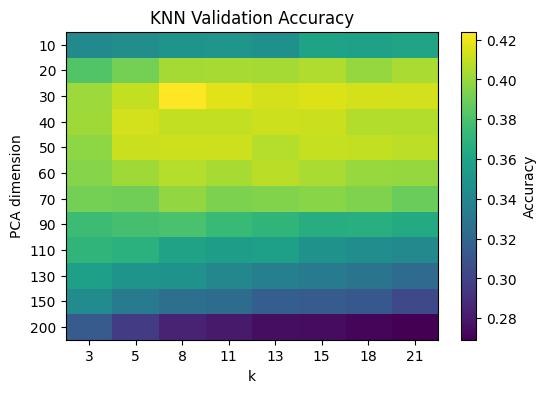

In [ ]:
pivot_acc = df.pivot(index="pca_dim", columns="k", values="accuracy")

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.imshow(pivot_acc, aspect="auto")
plt.colorbar(label="Accuracy")
plt.xticks(range(len(pivot_acc.columns)), pivot_acc.columns)
plt.yticks(range(len(pivot_acc.index)), pivot_acc.index)
plt.xlabel("k")
plt.ylabel("PCA dimension")
plt.title("KNN Validation Accuracy")
plt.show()


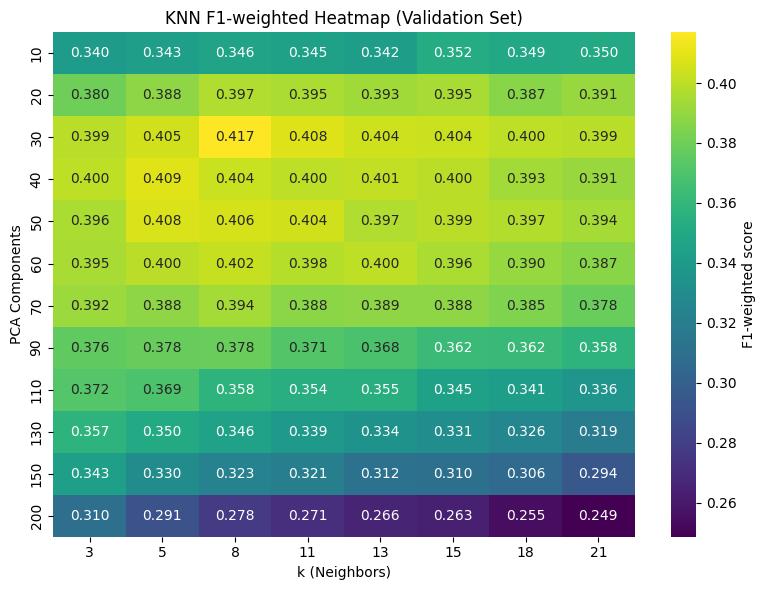

In [ ]:
# Pivot so rows = PCA dims, columns = k, values = F1 score
pivot_f1 = df.pivot(index="pca_dim", columns="k", values="f1_weighted")
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_f1,
    annot=True,
    cmap="viridis",
    fmt=".3f",
    cbar_kws={"label": "F1-weighted score"},
)

plt.title("KNN F1-weighted Heatmap (Validation Set)")
plt.xlabel("k (Neighbors)")
plt.ylabel("PCA Components")
plt.tight_layout()
plt.show()

Best by f1_weighted: PCA=30, k=8, score=0.4169
[Final model] PCA=30, k=8
Train+Val size: 28709, Test size: 7178


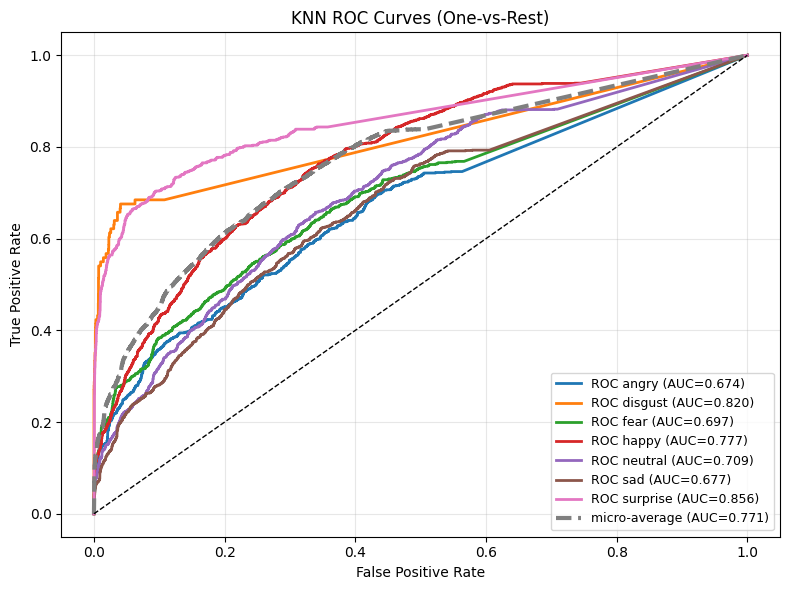

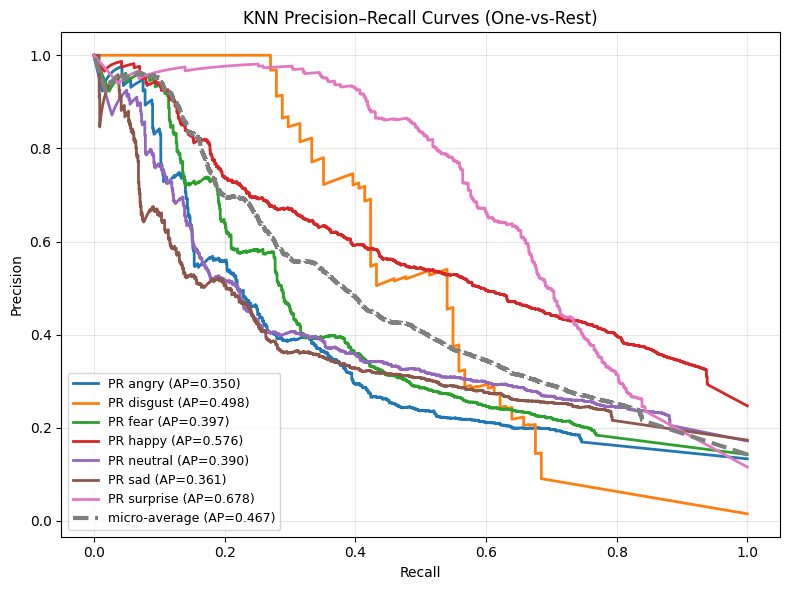

In [ ]:
# 4) train final model on train+val and get test scores
knn_final, scaler_final, pca_final, X_test_pca, y_test, y_score, class_names = search.train_best_model(
    results,
    test_dict=test_split,
    metric_name="f1_weighted",
)

# 5) plot ROC & PR curves in the notebook
KNNParamSearch.plot_roc_curves(y_test, y_score, class_names)
KNNParamSearch.plot_pr_curves(y_test, y_score, class_names)

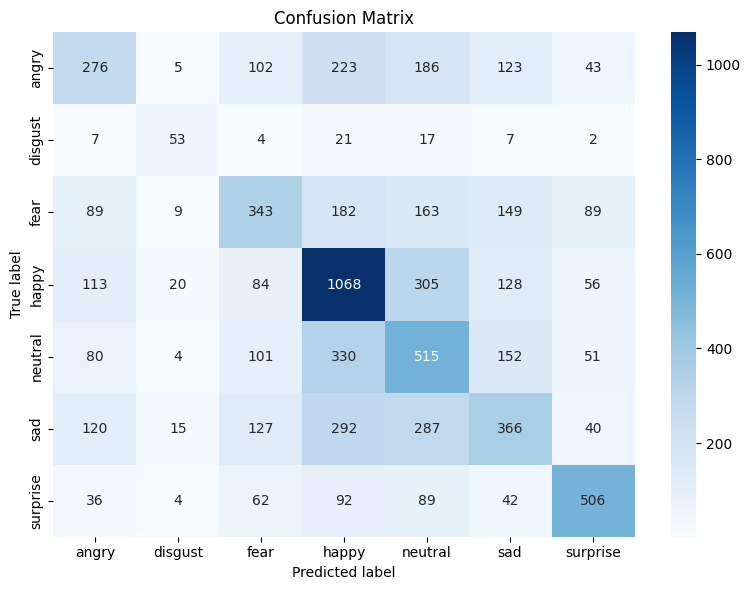

In [ ]:
y_pred = knn_final.predict(X_test_pca)

# Plot confusion matrix (raw counts)
KNNParamSearch.plot_confusion_matrix(y_test, y_pred, class_names)